In [9]:
import numpy as np
import matplotlib.pyplot as plt
import dataGen as dg
import numpy.fft as fft

\begin{align}
u &= -\ln\left(r/b\right) + \frac{\kappa \sin\theta}{r}
\\
v &= \theta - \frac{\kappa \cos\theta}{r}
\end{align}

$$\kappa = \frac{lf}{ka}$$

\begin{align}
\phi_U(r,\theta) = \frac{ka}{f}\left(r\theta\sin{\theta} - r\cos{\theta}\ln{\frac{r}{b}} + r\cos{\theta}\right)
\\
\phi_C(u,v) = \frac{-abk}{f}\exp\left(-u/a\right)\cos\left(v/a\right)
\end{align}

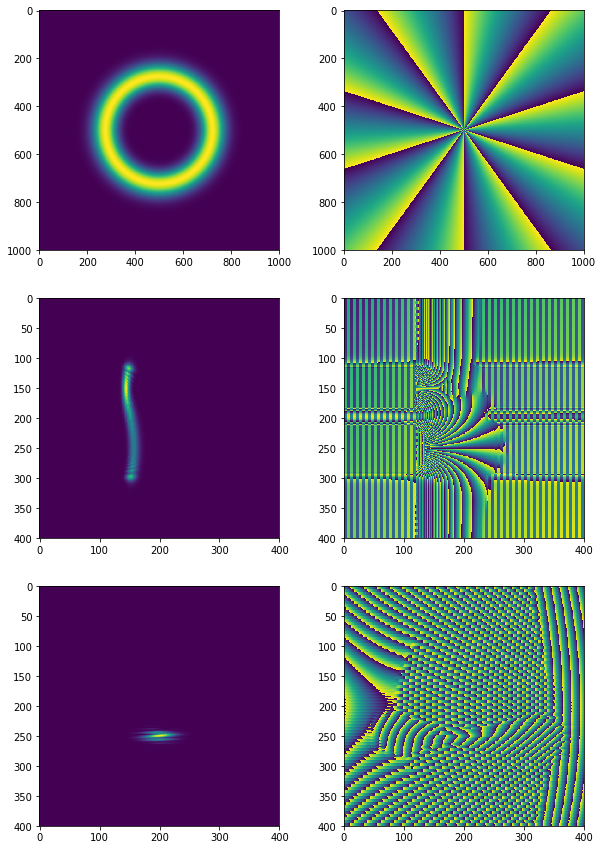

0.1
505


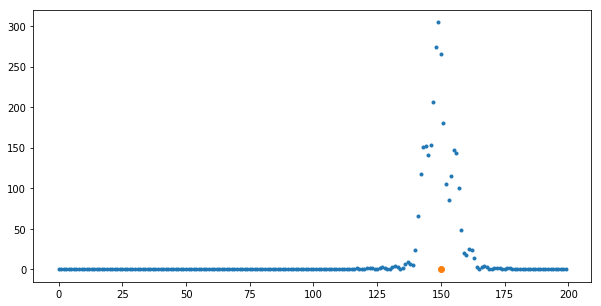

In [73]:
a = 10/(2*np.pi); b = 1; k = 2*np.pi; f = 1; κ = .1
l = 10
xres = 1000; yres = xres

x = np.linspace(-10,10,xres); y = np.linspace(-10,10,yres)
X,Y = np.meshgrid(x,y)

dx = x[1]-x[0]; dy = y[1]-y[0]
u = 2*np.pi/k*f*np.linspace(-1/(2*dx),(xres-2)/(2*dx*xres),xres)
v = 2*np.pi/k*f*np.linspace(-1/(2*dy),(yres-2)/(2*dy*yres),yres)
U,V = np.meshgrid(u,v)

phi_u = a*k/f*(Y*np.arctan2(Y,X)-X*np.log(np.sqrt(X**2+Y**2)/b)+X)
phi_c = -a*k*b/f*np.exp(-U/a)*np.cos(V/a)

mode = dg.LG(X,Y,l=l,w_0=2)
psi_U = mode*np.exp(1j*phi_u)
psi_L1 = fft.fftshift(fft.fft2(fft.fftshift(psi_U)))
psi_C = psi_L1*np.exp(1j*phi_c)
psi_L2 = fft.ifftshift(fft.ifft2(fft.fftshift(psi_C)))

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(np.abs(mode)**2)
plt.subplot(322); plt.imshow(np.angle(mode))
plt.subplot(323); plt.imshow(np.abs(psi_L1[300:700,300:700])**2)
plt.subplot(324); plt.imshow(np.angle(psi_L1[300:700,300:700]))
plt.subplot(325); plt.imshow(np.abs(psi_L2[300:700,300:700])**2)
plt.subplot(326); plt.imshow(np.angle(psi_L2[300:700,300:700]))
plt.show()

### analysis
first = psi_L2[:,500]#np.sum(psi_L2,axis=1)

tl = f/(k*a)
print(tl)
print(np.min(np.where(x>tl)))
plt.figure(figsize=(10,5)); plt.plot(np.abs(first[400:600])**2,'.')
plt.plot(np.min(np.where(x>l*tl))-400,0,'o'); plt.show()

0.1
505


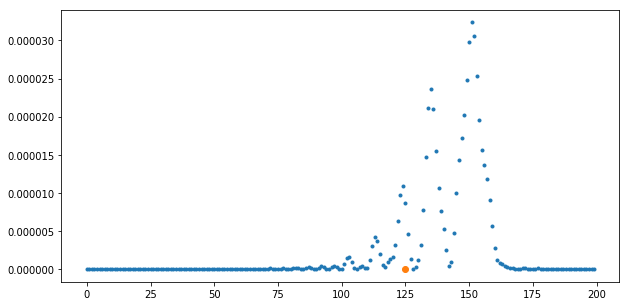

In [69]:
### analysis
first = np.sum(psi_L2,axis=1)

tl = f/(k*a)
print(tl)
print(np.min(np.where(x>tl)))
plt.figure(figsize=(10,5)); plt.plot(np.abs(first[400:600])**2,'.')
plt.plot(np.min(np.where(x>l*tl))-400,0,'o'); plt.show()